<a href="https://colab.research.google.com/github/namantam1/ml-ai-dnn/blob/main/Bag_of_n_grams_A_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
cv.fit(["Vikram singh is looking for a job"])
cv.vocabulary_

{'vikram': 5, 'singh': 4, 'is': 1, 'looking': 3, 'for': 0, 'job': 2}

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
cv.fit(["Vikram singh is looking for a job"])
cv.vocabulary_

{'vikram': 9,
 'singh': 7,
 'is': 2,
 'looking': 5,
 'for': 0,
 'job': 4,
 'vikram singh': 10,
 'singh is': 8,
 'is looking': 3,
 'looking for': 6,
 'for job': 1}

In [ ]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
  doc = nlp(text)
  return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

preprocess(corpus[0])

'Thor eat pizza'

In [ ]:
corpus_preprocessed = list(map(preprocess, corpus))
corpus_preprocessed

['Thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
cv.fit(corpus_preprocessed)
cv.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [ ]:
# generate bag of n=2 gram
cv.transform(["Thor eat pizza"]).A

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [ ]:
cv.transform(["Hulk eat pizza"]).A

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

# News Category Classification Problem

In [ ]:
import pandas as pd

df = pd.read_json("https://github.com/codebasics/nlp-tutorials/raw/main/11_bag_of_n_grams/news_dataset.json")


print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [ ]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [ ]:
# handle class imbalance by undersampling

min_samples = 1381

df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=1)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=1)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=1)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=1)
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis=0)
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category,
    test_size=0.2,
    random_state=1,
    stratify=df_balanced.category
)


y_train.value_counts()

BUSINESS    1105
SCIENCE     1105
SPORTS      1105
CRIME       1104
Name: category, dtype: int64

In [ ]:
y_test.value_counts()

CRIME       277
SPORTS      276
BUSINESS    276
SCIENCE     276
Name: category, dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB


clf = make_pipeline(
    CountVectorizer(ngram_range=(1, 1)), # using default
    MultinomialNB()
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

display(y_pred[10:15], y_test[10:15].to_numpy())

              precision    recall  f1-score   support

    BUSINESS       0.78      0.88      0.83       276
       CRIME       0.87      0.92      0.90       277
     SCIENCE       0.89      0.83      0.86       276
      SPORTS       0.92      0.81      0.86       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype='<U8')

array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype=object)

In [ ]:
clf = make_pipeline(
    CountVectorizer(ngram_range=(1, 2)), # using 2 nrgam
    MultinomialNB()
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

display(y_pred[10:15], y_test[10:15].to_numpy())

              precision    recall  f1-score   support

    BUSINESS       0.70      0.91      0.79       276
       CRIME       0.87      0.90      0.88       277
     SCIENCE       0.89      0.76      0.82       276
      SPORTS       0.92      0.75      0.83       276

    accuracy                           0.83      1105
   macro avg       0.84      0.83      0.83      1105
weighted avg       0.84      0.83      0.83      1105



array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype='<U8')

array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype=object)

In [ ]:
clf = make_pipeline(
    CountVectorizer(ngram_range=(1, 3)), # using 3 nrgam
    MultinomialNB()
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

display(y_pred[10:15], y_test[10:15].to_numpy())

              precision    recall  f1-score   support

    BUSINESS       0.68      0.91      0.78       276
       CRIME       0.87      0.89      0.88       277
     SCIENCE       0.89      0.75      0.81       276
      SPORTS       0.92      0.73      0.81       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype='<U8')

array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype=object)

# Using pre-processed text

In [ ]:
df_balanced['preprocessed_text'] = df_balanced['text'].apply(preprocess)

df_balanced.head()

,text,category,preprocessed_text
9625,Taking Your Startup Public Is Fraught With Neg...,BUSINESS,take Startup Public fraught negative old day e...
7958,Women in Business: Q&A with Donna Josephson Ch...,BUSINESS,woman Business Q&A Donna Josephson Chief Marke...
691,Ladies From the Shark Tank Excellent advice fr...,BUSINESS,lady Shark Tank Excellent advice lady continue...
4905,Farmer Forced To Dump Insane Amount Of Gorgeou...,BUSINESS,farmer force dump Insane Gorgeous Cherries che...
8899,Why You Should Care About The Backlash Against...,BUSINESS,care Backlash Holiday Creep term holiday creep...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_text,
    df_balanced.category,
    test_size=0.2,
    random_state=1,
    stratify=df_balanced.category
)


y_train.value_counts()

BUSINESS    1105
SCIENCE     1105
SPORTS      1105
CRIME       1104
Name: category, dtype: int64

In [ ]:
clf = make_pipeline(
    CountVectorizer(ngram_range=(1, 1)), # using default
    MultinomialNB()
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

display(y_pred[10:15], y_test[10:15].to_numpy())

              precision    recall  f1-score   support

    BUSINESS       0.82      0.84      0.83       276
       CRIME       0.84      0.93      0.89       277
     SCIENCE       0.87      0.83      0.85       276
      SPORTS       0.91      0.84      0.87       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype='<U8')

array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype=object)

In [ ]:
clf = make_pipeline(
    CountVectorizer(ngram_range=(1, 2)), # using 2 nrgam
    MultinomialNB()
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

display(y_pred[10:15], y_test[10:15].to_numpy())

              precision    recall  f1-score   support

    BUSINESS       0.81      0.86      0.83       276
       CRIME       0.84      0.92      0.88       277
     SCIENCE       0.89      0.83      0.86       276
      SPORTS       0.91      0.83      0.87       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype='<U8')

array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype=object)

In [ ]:
clf = make_pipeline(
    CountVectorizer(ngram_range=(1, 3)), # using 3 nrgam
    MultinomialNB()
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

display(y_pred[10:15], y_test[10:15].to_numpy())

              precision    recall  f1-score   support

    BUSINESS       0.80      0.86      0.83       276
       CRIME       0.84      0.92      0.88       277
     SCIENCE       0.90      0.83      0.86       276
      SPORTS       0.90      0.82      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype='<U8')

array(['SCIENCE', 'CRIME', 'CRIME', 'BUSINESS', 'CRIME'], dtype=object)

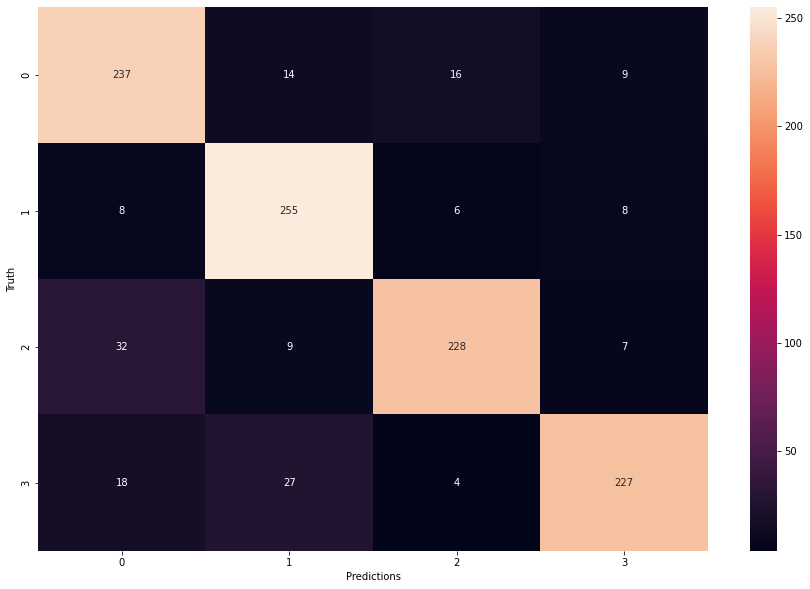

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.show()

# Lets solve exercise

In [82]:
import tensorflow as tf

file_path = tf.keras.utils.get_file("data.csv", "https://github.com/codebasics/nlp-tutorials/raw/main/11_bag_of_n_grams/Fake_Real_Data.csv")
file_path

'/root/.keras/datasets/data.csv'

In [ ]:
df = pd.read_csv(file_path)

df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [ ]:
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label,
    test_size=0.2,
    random_state=1,
    stratify=df.label
)

y_train.value_counts()

Fake    4000
Real    3920
Name: label, dtype: int64

In [ ]:
clf = make_pipeline(
    CountVectorizer(ngram_range=(1, 3)),
    MultinomialNB(),
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

display(
    y_test[10:15].to_numpy(),
    y_pred[10:15]
)

print(classification_report(y_test, y_pred))

array(['Fake', 'Fake', 'Fake', 'Fake', 'Fake'], dtype=object)

array(['Fake', 'Fake', 'Fake', 'Fake', 'Fake'], dtype='<U4')

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      1000
        Real       0.99      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[992,   8],
       [ 12, 968]])

In [ ]:
cv = clf.steps[0][1]

len(cv.vocabulary_.keys())

3006332